In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 2: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/internship/humidity.csv')  # Use correct path if uploading in Colab
print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB
None

Sample Data:
   sensor_id     lat     lon  pressure  temperature  humidity
0       2266  42.738  23.272  95270.27        23.46     62.48
1       2292  42.663  23.273  94355.83        23.06     59.46
2       3096  42.700  23.360  95155.81        26.53     44.38
3       3428  42.624  23.406  94679.57        28.34     38.28
4       3472  42.669  23.318  94327.88        26.31     46.37



Summary Statistics:
           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.630000      34.140000  
50%        24.780000      48.350000  
75%        29.870000      62.940000  
max        61.170000     100.000000  

Missing Values

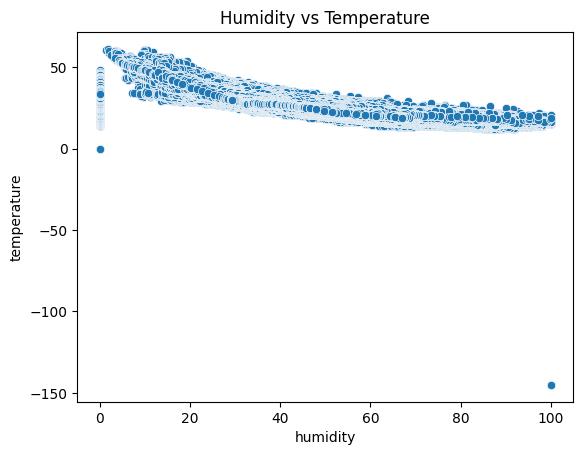

In [4]:
# Step 3: Basic EDA
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize relationship
sns.scatterplot(x='humidity', y='temperature', data=df)
plt.title("Humidity vs Temperature")
plt.show()


In [7]:
# Data Preprocessing
# Drop rows with missing values if any
df.dropna(inplace=True)

# Features and target
X = df[['humidity']]  # Independent variable
y = df['temperature']  # Target variable

In [8]:
#  Train-Test Split
# Beform training we split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

#pridiction
y_pred = model.predict(X_test)

In [11]:
# Step 8: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error: 144.08
R² Score: 0.26


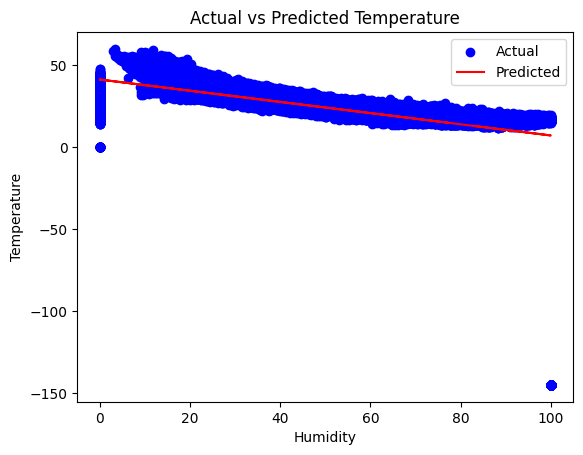

In [12]:
plt.scatter(X_test, y_test, label="Actual", color='blue')
plt.plot(X_test, y_pred, label="Predicted", color='red')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()
